## Project: Titanic - Machine learning from disaster

# Exploratory data analysis

### Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# Preview training data
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Features `Age`, `Cabin`, and `Embarked` do not have enough data of all the passengers in the trip.

In [4]:
train_df.set_index(train_df['PassengerId'], inplace=True)
train_df.drop(['PassengerId'], axis=1, inplace=True) 

test_df.set_index(test_df['PassengerId'], inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True) 

train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for feature in features:
    train_df[feature] = train_df[feature].astype('category')
for feature in features:
    if feature == 'Survived':
        continue
    test_df[feature] = test_df[feature].astype('category')

train_df.describe(include='category')

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


* Most people did not survive from the disaster.

### Correlation between features in the data

#### `Survive` feature

In [6]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


* Only 38% of the passengers survived in the disaster, which leads to a slight data imbalance.

#### `Survived` with respect to `Sex`, `Pclass`, `SibSp`, `Parch`, and `Embarked`

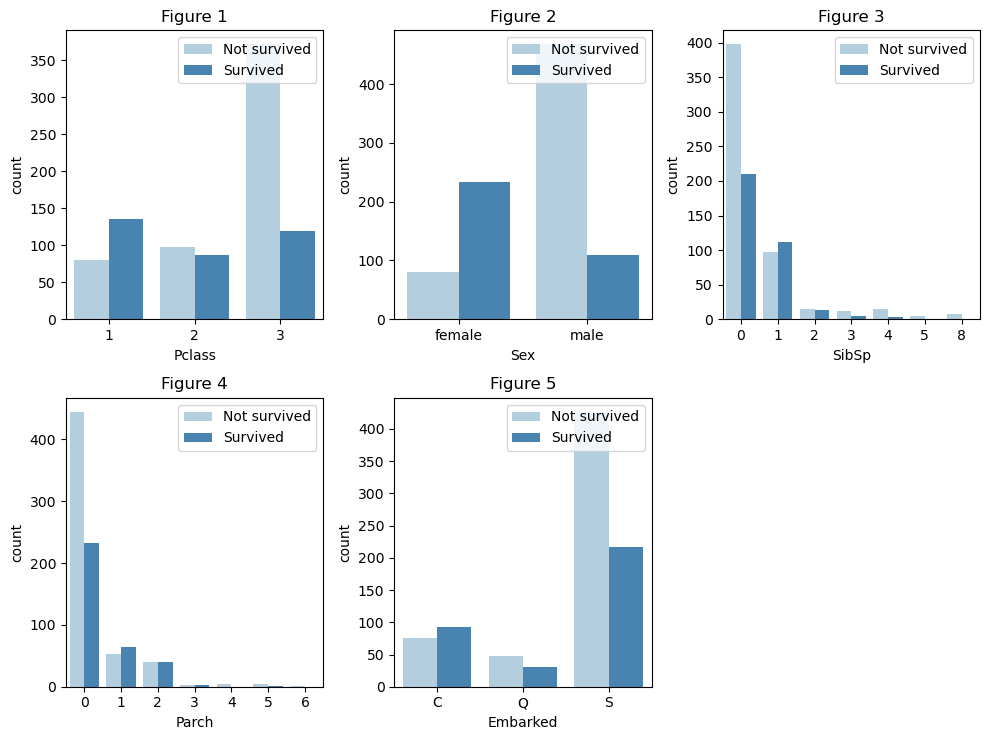

In [7]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

fig, ax = plt.subplots(2, 3, figsize=(2*5, 3*2.5))

for i in range(len(features)):
    r,c = (0,i) if i < 3 else (1,i-3)
    sn.countplot(data = train_df, x=features[i], hue='Survived', ax=ax[r,c], palette='Blues')
    ax[r,c].set_title(f"Figure {i + 1}")
    ax[r,c].legend(labels=['Not survived', 'Survived'], loc='upper right')

ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

- Figure 1: 1st class has higher chance to survive.
- Figure 2: Female are priored to survive.
- Figure 3: Those who have 1-2 siblings will have higher chance to survive.
- Figure 4: Those who have 1-3 parents/children will have higher chance to survive. 
- Figure 5: Those who get on the boat from C port will have higher chance to survive.

#### `Age`

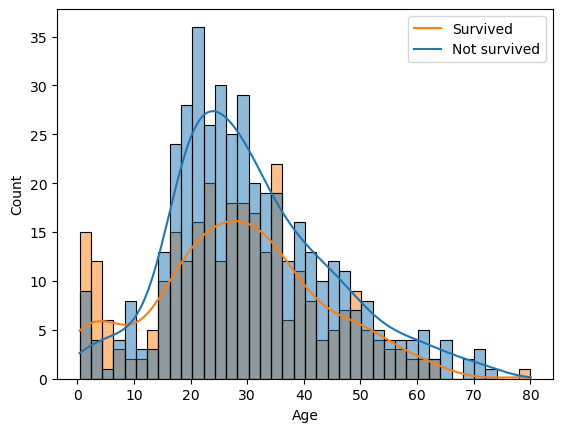

In [8]:
plot2, ax2 = plt.subplots(1,1)
sn.histplot(data = train_df, x='Age', hue='Survived', bins=5*8, kde=True)
ax2.legend(labels=['Survived', 'Not survived'])

- Most children will be priored to survived.
- Small proportion of people at the age of 34-36, 48-50, and 78-80 survived.

#### `Fare`

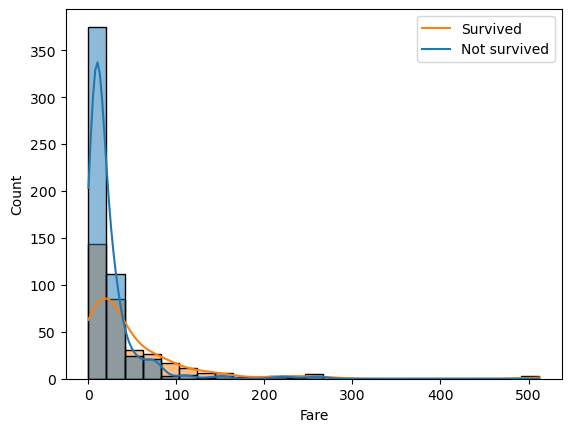

In [9]:
plot3, ax3 = plt.subplots(1,1)
sn.histplot(data = train_df, x='Fare', hue='Survived', bins=5*5, kde=True)
ax3.legend(labels=['Survived', 'Not survived'])

- The data is distributed skewedly to the left.

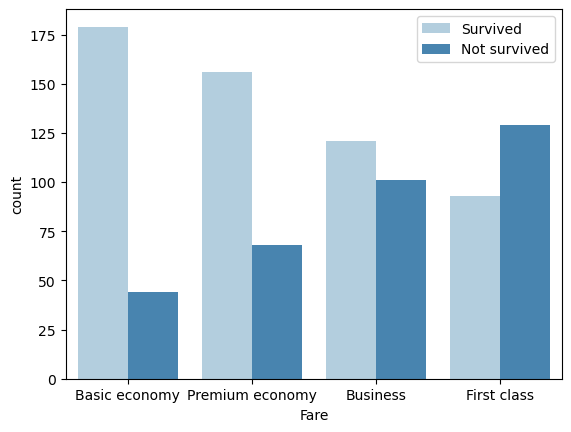

In [10]:
fare_categories = ['Basic economy', 'Premium economy', 'Business', 'First class']
fare_quartile = pd.qcut(x=train_df['Fare'], q=4, labels=fare_categories)

plot4, ax4 = plt.subplots(1,1)
sn.countplot(x=fare_quartile, hue=train_df['Survived'], palette='Blues')
ax4.legend(labels=['Survived', 'Not survived'])

- First class will likely to have higher chance to survive, while Basic economy will have lower chance.

# Feature engineering

#### `Name`

In [11]:
import re

def get_title(name):
    expression = re.compile(r',([\w\s]+)\.')    # Use regex101 to test
    return expression.search(name).group(1).strip()

train_df['Title'] = train_df['Name'].apply(lambda name: get_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name: get_title(name))

train_df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [12]:
def group_titles(title):
    if title in ['Mr', 'Mrs', 'Master']:
        return title
    elif title in ['Miss', 'Ms']:
        return 'Miss'
    else:
        return 'Others'
    
train_df['Title'] = train_df['Title'].apply(lambda title: group_titles(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_titles(title))

train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

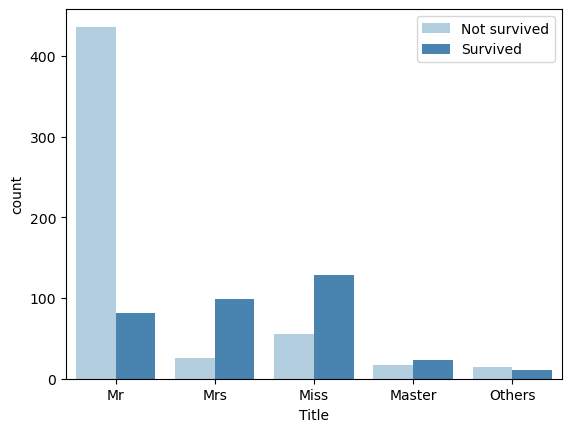

In [13]:
fig5, ax5 = plt.subplots(1,1)
sn.countplot(data = train_df, x='Title', hue='Survived', palette='Blues')
ax5.legend(labels = ['Not survived', 'Survived'])

- Women will have higher chance to survive.
- Those who have Master degree will have higher chance too.

#### `SibSp` and `Parch`

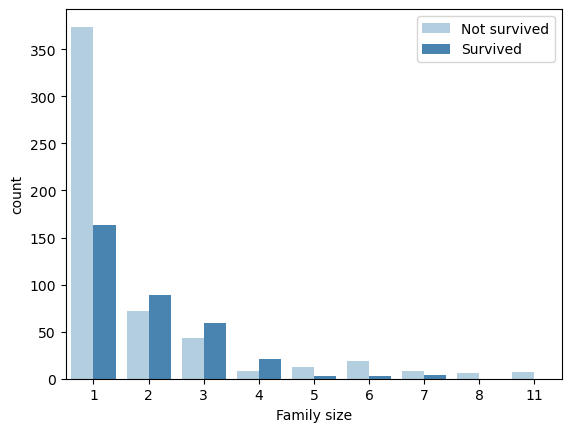

In [14]:
train_df['Family size'] = train_df['SibSp'].astype('Int64') + train_df['Parch'].astype('Int64') + 1 # Information of 1 passenger with his/her family members
test_df['Family size'] = test_df['SibSp'].astype('Int64') + test_df['Parch'].astype('Int64') + 1 # Information of 1 passenger with his/her family members

fig6, ax6 = plt.subplots(1,1)
sn.countplot(data = train_df, x='Family size', hue='Survived', palette='Blues')
ax6.legend(labels = ['Not survived', 'Survived'])

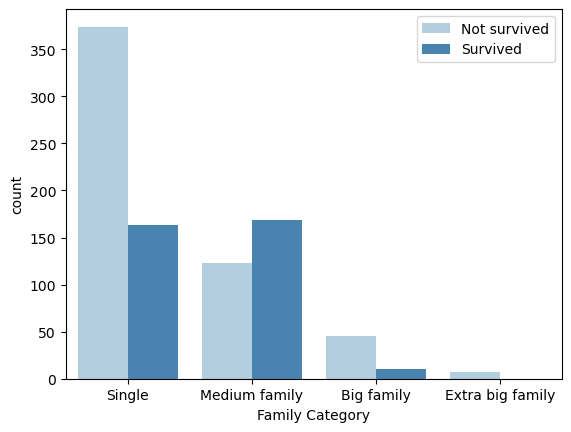

In [15]:
train_df['Family Category'] = pd.cut(x=train_df['Family size'], bins=[0,1,4,8,11], labels=['Single', 'Medium family', 'Big family', 'Extra big family'])
test_df['Family Category'] = pd.cut(x=test_df['Family size'], bins=[0,1,4,8,11], labels=['Single', 'Medium family', 'Big family', 'Extra big family'])

fig7, ax7 = plt.subplots(1,1)
sn.countplot(data = train_df, x='Family Category', hue='Survived', palette='Blues')
ax7.legend(labels = ['Not survived', 'Survived'])

- Medium family will have higher chance to survive.

#### Filling missing values

In [16]:
Numerial_features = ['Age', 'Fare']
Categorical_features = ['Title', 'Sex', 'Pclass', 'Family Category', 'Embarked']

feature_columns = Numerial_features + Categorical_features

feature_columns

['Age', 'Fare', 'Title', 'Sex', 'Pclass', 'Family Category', 'Embarked']

In [17]:
def print_missing_values(data, features):
    for feature in features:
        total_missing_values = data[feature].isnull().sum()
        if total_missing_values > 0:
            print(f'Feature {feature} is missing {total_missing_values/data[feature].shape[0]*100.0:.2f} % of total data.')

print('Training dataset:')
print_missing_values(train_df, feature_columns)

print('\nTesting dataset:')
print_missing_values(test_df, feature_columns)

Training dataset:
Feature Age is missing 19.87 % of total data.
Feature Embarked is missing 0.22 % of total data.

Testing dataset:
Feature Age is missing 20.57 % of total data.
Feature Fare is missing 0.24 % of total data.


##### `Age`

In [18]:
train_df.groupby(['Sex', 'Pclass']).median()['Age']

C:\Users\Admins\AppData\Local\Temp\ipykernel_25256\2856243361.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby(['Sex', 'Pclass']).median()['Age']


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [19]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))

train_df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889    21.5
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

##### `Embarked` and `Fare`

In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [21]:
numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', OneHotEncoder(handle_unknown='ignore'))])

transformer = ColumnTransformer(transformers=[
    ('num', numerical_transformer, Numerial_features),
    ('cat', categorical_transformer, Categorical_features)
])

transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Title', 'Sex', 'Pclass', 'Family Category',
                                  'Embarked'])])

In [22]:
X = transformer.fit_transform(train_df[feature_columns])
X_test = transformer.transform(test_df[feature_columns])

In [23]:
y = train_df['Survived']

#### Split dataset

In [26]:
from sklearn.model_selection import train_test_split

seed = 10

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, train_df['Survived'], test_size=0.1, stratify=train_df['Survived'], random_state=seed)

In [28]:
print('Train size:', X_train.shape[0])
print('Validate size:', X_val.shape[0])
print('Test size:', X_test.shape[0])

Train size: 801
Validate size: 90
Test size: 418


# Model selection

#### Cross-validation

In [29]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
models = [
    KNeighborsClassifier(),
    LogisticRegression(random_state=seed),
    Perceptron(random_state=seed),
    MLPClassifier(random_state=seed),
    SVC(random_state=seed),
    LinearSVC(random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    MultinomialNB(),
    XGBClassifier()
]

In [37]:

kfold = StratifiedKFold(shuffle=True, random_state=seed)
data = []
for model in models:
    model_name = model.__class__.__name__
    score = cross_val_score(estimator=model, X=X, y=y, cv=kfold, scoring='accuracy')
    data.append((model_name, score.mean(), score.std()))

df = pd.DataFrame(data=data, columns=['Model name', 'Mean accuracy', 'Standard deviation'])
df

,Model name,Mean accuracy,Standard deviation
0,KNeighborsClassifier,0.815912,0.029305
1,LogisticRegression,0.829377,0.038144
2,Perceptron,0.712667,0.163561
3,MLPClassifier,0.830513,0.032711
4,SVC,0.836118,0.033496
5,LinearSVC,0.830500,0.039569
6,DecisionTreeClassifier,0.784521,0.020182
7,RandomForestClassifier,0.810345,0.029462
8,MultinomialNB,0.801324,0.032993
9,XGBClassifier,0.826025,0.016412


In [38]:
model_compare = [
    LogisticRegression(random_state=seed),
    MLPClassifier(random_state=seed),
    SVC(random_state=seed),
    LinearSVC(random_state=seed),
    RandomForestClassifier(random_state=seed),
    XGBClassifier()
]

data_compare = []
for model in model_compare:
    model_name = model.__class__.__name__
    score = cross_val_score(estimator=model, X=X, y=y, cv=kfold, scoring='accuracy')
    for id, score in enumerate(score):
        data_compare.append((model_name, id, score))

df_compare = pd.DataFrame(data=data_compare, columns=['Model name', 'Fold id', 'Accuracy score']) 
df_compare

,Model name,Fold id,Accuracy score
0,LogisticRegression,0,0.854749
1,LogisticRegression,1,0.769663
2,LogisticRegression,2,0.876404
3,LogisticRegression,3,0.803371
4,LogisticRegression,4,0.842697
5,MLPClassifier,0,0.843575
6,MLPClassifier,1,0.780899
7,MLPClassifier,2,0.876404
8,MLPClassifier,3,0.808989
9,MLPClassifier,4,0.842697


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
data_compare = []
for model in model_compare:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    data_compare.append((model_name, score))

df_compare = pd.DataFrame(data=data_compare, columns=['Model name', 'Validation score']) 
df_compare

,Model name,Validation score
0,LogisticRegression,0.844444
1,MLPClassifier,0.888889
2,SVC,0.888889
3,LinearSVC,0.866667
4,RandomForestClassifier,0.877778
5,XGBClassifier,0.855556


#### Hyperparameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
model = SVC(random_state=seed)

param_dist = {
    "kernel": ['poly', 'rbf'],
    "tol":[1e-2, 1e-3, 1e-4],
    "C":[1, 1e2, 1e3],
    "max_iter": [200, 500, 1000, 2000]
}
tuner = GridSearchCV(estimator=model, param_grid=param_dist, scoring='accuracy', cv=kfold)
tuned_model = tuner.fit(X, y)
tuned_model.best_params_

{'C': 1, 'kernel': 'rbf', 'max_iter': 500, 'tol': 0.01}

#### Evaluate model

In [43]:
print(f'Accuracy score of hyperparameter-tuned model: {(tuned_model.score(X_val, y_val)*100):.2f} %')

Accuracy score of hyperparameter-tuned model: 90.00 %


In [44]:
model.fit(X, y)
y_pred = model.predict(X_val)
print(f'Accuracy score of original model: {(accuracy_score(y_val, y_pred)*100):.2f} %')

Accuracy score of original model: 90.00 %


# Prediction test

In [45]:
prediction_result = tuned_model.predict(X_test)

In [46]:
test_df['Survived'] = prediction_result
test_df['Survived'].value_counts()

0    277
1    141
Name: Survived, dtype: int64

In [47]:
test_df['Survived'].to_csv('./gender_submission.csv')